## Plots diff diff diff PI/PD

### Div imports:

In [38]:
# load and autoreload
from IPython import get_ipython
from matplotlib import colors
from useful_scit.imps import (plt)

from sect_sens.constants import get_plotpath
from sect_sens.data_info.simulation_types import get_diff_by_type
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.practical_functions import make_folders
from sect_sens.data_info.simulation_types import get_abs_by_type

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
from sect_sens.util.plot.maps_PIPD import abs_diffs, abs_diffs_PI_PD_sep, diffs_PI_PD_sep

### Div settings: 

In [40]:
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [41]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0005-12'

In [42]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl',
    'NF1850_SECT_svoc_smax',
    'NF1850_aeroxid2014_SECT_svoc_smax',
    'NF1850_SECT_elvoc_smax',
    'NF1850_aeroxid2014_SECT_elvoc_smax',

]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
]

cases = cases_orig + cases_sec

### For output names:

In [43]:
version = 'pi_pd_diff-elvoc'

plot_path = get_plotpath('maps')
filen_base = plot_path + '/%s' % version
# print(plot_path)
make_folders(plot_path)

In [44]:
print(filen_base)

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/maps//pi_pd_diff-elvoc


### Variables to load:

In [56]:
varl = ['NCONC01', 'NMR01', 'N_AER', 'ACTNL_incld', 'ACTREL_incld', 'CDNUMC', 'cb_NA',
        'cb_SOA_NA', 'cb_SO4_NA', 'AWNC_incld', 'AREL_incld',  # ,'NCONC08','NCONC09','NMR08','NMR09'
        'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan' ]#, 'N50','N100','N250','N150','N200', 'SIGMA01','NMR01','NCONC01']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'NMR01', 'N_AER', 'ACTNL_incld', 'ACTREL_incld', 'CDNUMC', 'cb_NA', 'cb_SOA_NA', 'cb_SO4_NA', 'AWNC_incld', 'AREL_incld', 'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan']


## Load data from file: 
The following algortithm computes and loades map averages. 

In [57]:

case_dic = get_averaged_fields.get_maps_cases(cases,
                                              varl,
                                              startyear,
                                              endyear,
                                              avg_over_lev=avg_over_lev,
                                              pmin=pmin,
                                              pressure_adjust=pressure_adjust,
                                              p_level=p_level,
                                              )

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NCONC01_0004-01-0005-12_avg2lev850.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NMR01_0004-01-0005-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/N_AER_0004-01-0005-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/ACTNL_incld_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/ACTREL_incld_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/CDNUMC_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/cb_NA_0004-01-0005-12_lev_not_dim.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_

## Calculate various variables:

In [58]:
for case in cases:
    _ds = case_dic[case]
    _ds['NPF_frac'] = _ds['NCONC01'] / _ds['N_AER'] * 100
    _ds['NPF_frac'].attrs['units'] = '%'
if 'NPF_frac' not in varl:
    varl.append('NPF_frac')

### Get difference from PI to PD

In [59]:
relative = False
dic_diff = get_diff_by_type(case_dic, varl, ctrl='PI', case_types=['PI', 'PIaerPD'],
                            mod_types=['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$',
                                       'OsloAero$_{imp}$', 'OsloAero$_{def}$'],
                            # mod_types=['OsloAeroSec','OsloAero$_{def}$'],
                            relative=relative)

dic_diff.keys()
di_dic = dic_diff['PIaerPD-PI']
di_dic.keys()

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_SECT_svoc_smax-NF1850_SECT_svoc_smax
subtracting NF1850_SECT_elvoc_smax-NF1850_SECT_elvoc_smax
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_SECT_svoc_smax-NF1850_SECT_svoc_smax
subtracting NF1850_aeroxid2014_SECT_elvoc_smax-NF1850_SECT_elvoc_smax
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def


dict_keys(['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'])

### Organize data in easy to use format:

In [60]:
relative = False

dic_abs = get_abs_by_type(case_dic,
                          case_types=['PI', 'PIaerPD'],
                          mod_types=['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$',
                                     'OsloAero$_{def}$'],
                          )

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAeroSec$_{svoc}$', 'OsloAeroSec$_{elvoc}$', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']


### plot settings

In [61]:
norm_dic = dict(
    SOA_LV=colors.SymLogNorm(vmin=-5e-1, vmax=5e-1, linthresh=.01, base=10, linscale=.4),
    H2SO4=colors.SymLogNorm(vmin=-5e-1, vmax=5e-1, linthresh=.01, base=10, linscale=.4),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10, linscale=.4),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1, base=10),  # linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1, base=10),
    ACTNL_incld=colors.SymLogNorm(vmin=-40, vmax=40, linthresh=1, linscale=0.4, base=10),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1, base=10),
    ACTREL_incld=colors.SymLogNorm(vmin=-7, vmax=7, linthresh=.1, base=10, linscale=0.5),
    CDNUMC=None,
    SWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    LWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    NCFT_Ghan=colors.Normalize(vmin=-2, vmax=2),

)
norm_dic_rel = dict(
    SOA_LV=colors.Normalize(vmin=-50, vmax=50),
    H2SO4=colors.Normalize(vmin=-50, vmax=50),
    NCONC01=colors.Normalize(vmin=-250, vmax=250),
    NMR01=colors.Normalize(vmin=-50, vmax=50),
    AWNC_incld=colors.Normalize(vmin=-50, vmax=50),
    ACTNL_incld=colors.Normalize(vmin=-13, vmax=13),
    AREL_incld=colors.Normalize(vmin=-10, vmax=10),
    ACTREL_incld=colors.Normalize(vmin=-7, vmax=7),
    CDNUMC=colors.Normalize(vmin=-12, vmax=12),

    SWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    LWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    NCFT_Ghan=colors.Normalize(vmin=-2, vmax=2),

)

norm_abs = norm_dic.copy()
norm_abs['SWCF_Ghan'] = colors.Normalize(vmin=-5, vmax=5)
norm_abs['LWCF_Ghan'] = colors.Normalize(vmin=-3, vmax=3)
norm_abs['NCFT_Ghan'] = colors.Normalize(vmin=-5, vmax=5)

In [62]:
norm_diff_dic = dict(
    ACTNL_incld=colors.Normalize(vmin=-12, vmax=12),
    SWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    NCFT_Ghan=colors.Normalize(vmin=-1.5, vmax=1.5),
    NCONC01=colors.Normalize(vmin=-100, vmax=100),
    N50=colors.Normalize(vmin=-45, vmax=45),
    N100=colors.Normalize(vmin=-20, vmax=20),
    N150=colors.Normalize(vmin=-10, vmax=10),  # colors.Normalize(vmin=-5, vmax=5),
    N200=colors.Normalize(vmin=-15, vmax=15),  # colors.Normalize(vmin=-5, vmax=5),
)

## Plots:

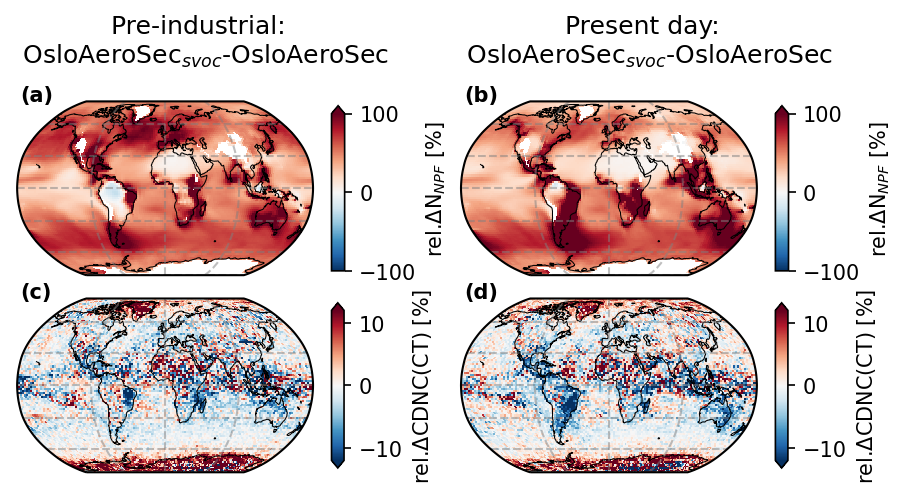

In [64]:
varl = ['NCONC01', 'ACTNL_incld']  # ,'SWCF_Ghan','NCFT_Ghan']#,'N150','N200']#,'N250'] #'N50',
case_oth = 'OsloAeroSec$_{svoc}$'
ctrl = 'OsloAeroSec'
relative = True

fg, axs = diffs_PI_PD_sep(dic_abs,
                          varl,
                          case_types=None,
                          ctrl=ctrl,
                          case_oth=case_oth,
                          sfg_size=3.5,
                          asp_rat=.5,
                          relative=relative,
                          norm_diff_dic=norm_diff_dic,
                          type_nndic=None,
                          height_ratios=None
                          )
vl = '_'.join(varl)

#%subp_insert_abc(np.array(axs), pos_x=-0.12,pos_y=.95)

cc1 = ctrl.replace('$', '').replace('{', '').replace('}', '')
cc2 = case_oth.replace('$', '').replace('{', '').replace('}', '')
fn = filen_base + f'{vl}_{cc2}_{cc1}_sep_rel{relative}_{str(int(pmin))}.pdf'
fg.savefig(fn, dpi=300)
plt.show()

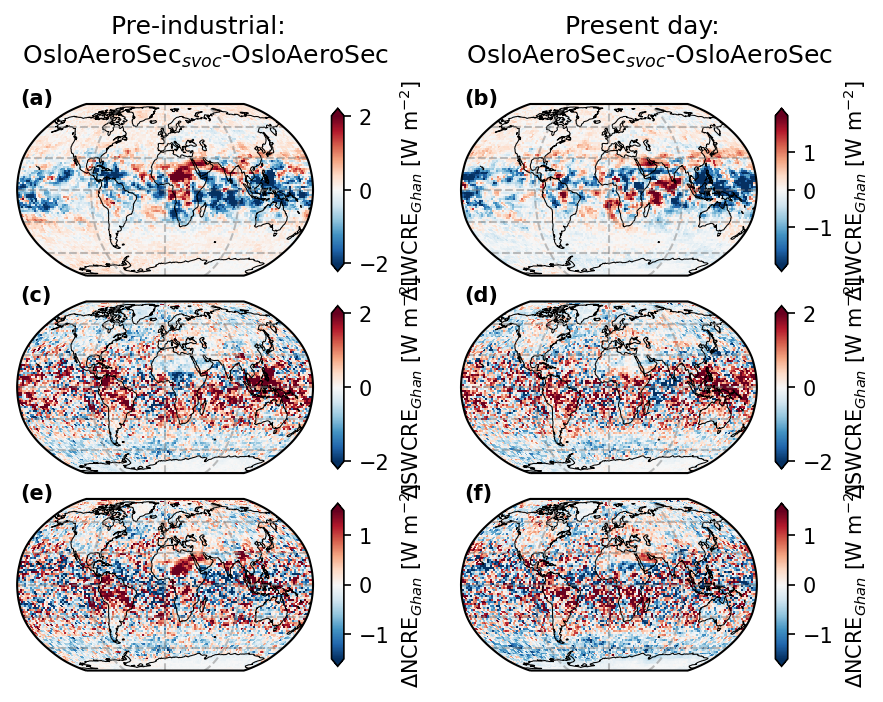

In [66]:
varl = ['LWCF_Ghan', 'SWCF_Ghan', 'NCFT_Ghan']  # ,'N150','N200']#,'N250'] #'N50',
case_oth = 'OsloAeroSec$_{svoc}$'
ctrl = 'OsloAeroSec'
relative = False

fg, axs = diffs_PI_PD_sep(dic_abs,
                          varl,
                          case_types=None,
                          ctrl=ctrl,
                          case_oth=case_oth,
                          sfg_size=3.5,
                          asp_rat=.5,
                          relative=relative,
                          norm_diff_dic=norm_diff_dic,
                          type_nndic=None,
                          height_ratios=None
                          )
vl = '_'.join(varl)

#%subp_insert_abc(np.array(axs), pos_x=-0.12,pos_y=.95)

cc1 = ctrl.replace('$', '').replace('{', '').replace('}', '')
cc2 = case_oth.replace('$', '').replace('{', '').replace('}', '')
fn = filen_base + f'{vl}_{cc2}_{cc1}_sep_rel{relative}_{str(int(pmin))}.pdf'
fg.savefig(fn, dpi=300)
plt.show()